In [1]:
# Data Science packages
import pandas as pd
import numpy as np

# Graphing packages
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

# Interactive plot packages
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [87]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")
    
key = read_key("../keys/plotly_key.txt")

plotly.tools.set_credentials_file(username = 'aialba', api_key = key)

In [223]:
# Here i am reading in the csv using only columns specified in stuff.

cols = pd.read_csv('../stuff.csv')

cols

df_2017 = pd.read_csv('../personsx.csv', usecols = cols['Feature name in Doc'])
df_2017 = df_2017.fillna(0)
df_2017.head()

,SEX,NOWAF,FMX,RACRECI3,R_MARITL,HISCODI3,AGE_P,SRVY_YR,PARENTS,DAD_DEGP,...,LADURA18,LADURB17,LADURB18,LACHRC17,LACHRC18,HIKINDNK,YRSINUS,CITIZENP,EDUC1,ERNYR_P
0,2,0.0,1,1,4,2,65,2017,4,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,15,0.0
1,2,2.0,1,2,7,3,27,2017,4,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,13,0.0
2,1,0.0,1,2,0,3,10,2017,1,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,3,0.0
3,1,2.0,1,1,7,2,19,2017,4,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,15,1.0
4,2,2.0,1,1,1,2,43,2017,4,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1,14,0.0


## Distribution of Income

In [184]:
# ernyr_p_key is a dictionary that matches the key values (which are in the df) 
# and changes it to its human readable label

ernyr_p_key = {1: '01-4,999', 2: '05,000-9,999', 3: '10,000-14,999',
               4:'15,000-19,999', 5: '20,000-24,999', 6: '25,000-34,999',
              7: '35,000-44,999', 8: '45,000-54,999', 9: '55,000-64,999',
              10: '65,000-74,999', 11: '75,000 and over', 0: 'Unknown',
              97: 'Refused', 98: 'Not ascertained', 99: 'Don\'t know'}

df_2017 = df_2017.sort_values(by = ['ERNYR_P'])
df_2017['ERNYR_P'] = df_2017['ERNYR_P'].apply(lambda x: ernyr_p_key[x])
df_2017['ERNYR_P'].value_counts()

Unknown            38573
75,000 and over     6276
25,000-34,999       4322
Don't know          4167
Refused             3890
35,000-44,999       3672
45,000-54,999       3088
55,000-64,999       2387
20,000-24,999       2347
01-4,999            2066
15,000-19,999       1942
10,000-14,999       1933
05,000-9,999        1739
65,000-74,999       1707
Not ascertained       23
Name: ERNYR_P, dtype: int64

In [92]:
# here i remove all of the NA values from the matrix

not_unknown = [(a != 'Unknown') for a in df_2017['ERNYR_P']]
incomes = df_2017['ERNYR_P'][not_unknown]

[Text(0, 0.5, 'Persons'), Text(0.5, 0, 'Earnings (USD)')]

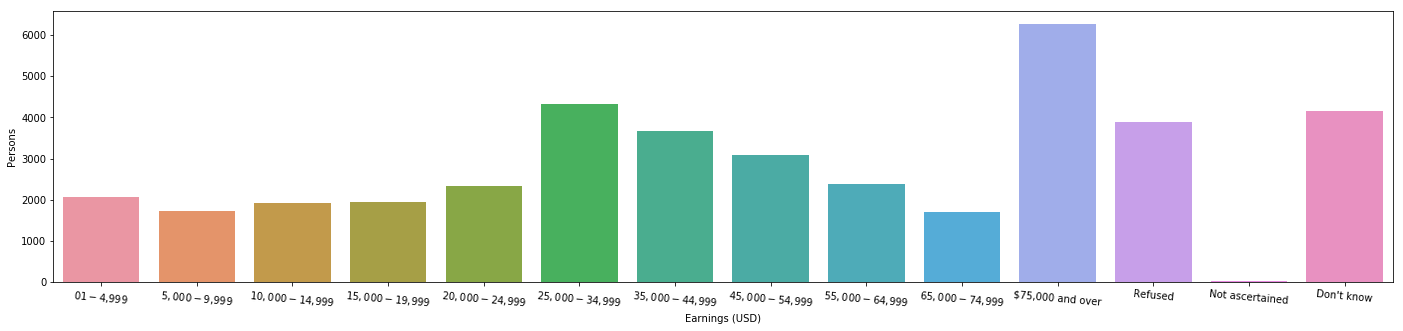

In [68]:
# graph of the distribution of salaries

plt.figure(figsize = (24, 5))

income_plot = sns.countplot(x = incomes)
income_plot.set_xticklabels(income_plot.get_xticklabels(), rotation = -5)
income_plot.set(xlabel = 'Earnings (USD)', ylabel = 'Persons')

## Plot for Depression

In [188]:
# similar to before, the key matches the key value to its human readable label
# then i switch out the values in the df for the labels and remove the NA rows

ladurb17_key = {1: 'Depressed for Less than 2 months', 2: 'Depressed for 3-5 months', 
                3: 'Depressed for 6-12 months', 4: 'Depressed for More than 1 year',
               7: 'Refused', 8: 'Not Ascertained', 9: 'Don\'t Know' , 0: 'Unknown'}

df_2017 = df_2017.sort_values( by = ['LADURB17'])
df_2017['LADURB17'] = df_2017['LADURB17'].apply(lambda x: ladurb17_key[x])

not_unknown = [(a != 'Unknown') for a in df_2017['LADURB17']]
depression = df_2017['LADURB17'][not_unknown]
depression.value_counts()

Depressed for More than 1 year      1443
Depressed for 6-12 months             59
Don't Know                            10
Depressed for 3-5 months               8
Depressed for Less than 2 months       8
Refused                                5
Not Ascertained                        1
Name: LADURB17, dtype: int64

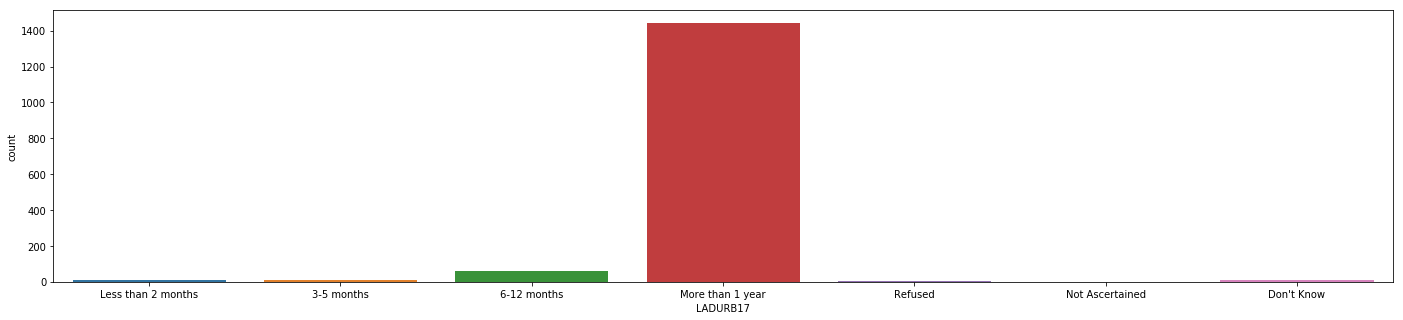

In [85]:
plt.figure(figsize = (24, 5))

depression_plot = sns.countplot(x = depression)

## Plot for Depression by Income Level

In [189]:
# Reading in the Column names
cols = pd.read_csv('../stuff.csv')

# Reading the CSV
df_2017 = pd.read_csv('../personsx.csv', usecols = cols['Feature name in Doc'])
df_2017 = df_2017.fillna(0)

# Sorting it by the columns of interest
df_2017 = df_2017.sort_values(by = ['ERNYR_P', 'LADURB17'])

# Subsetting the DF to only columns of interest
df = df_2017[['ERNYR_P', 'LADURB17']]

# Renaming the factor levels
df['ERNYR_P'] = df['ERNYR_P'].apply(lambda x: str(ernyr_p_key[x]))
df['LADURB17'] = df['LADURB17'].apply(lambda x: str(ladurb17_key[x]))

# Removing the NA factor values
df = df[df['LADURB17'] != 'Unknown']
df = df[df['ERNYR_P'] != 'Unknown']
df.head()

/Users/Andy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Andy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ERNYR_P,LADURB17
5580,"01-4,999",Depressed for 6-12 months
9187,"01-4,999",Depressed for 6-12 months
21989,"01-4,999",Depressed for 6-12 months
25516,"01-4,999",Depressed for 6-12 months
25696,"01-4,999",Depressed for 6-12 months


In [129]:
df['LADURB17'].value_counts()

More than 1 year      1443
6-12 months             59
Don't Know              10
Less than 2 months       8
3-5 months               8
Refused                  5
Not Ascertained          1
Name: LADURB17, dtype: int64

In [179]:
def make_df_for_counts(df, category, second_category, value, name1, name2):
    '''
        
    '''
    temp = pd.DataFrame(df[df[category] == value][second_category].value_counts())
    temp = temp.reset_index()
    temp.columns = [name2, 'Count']
    temp[name1] = value
    temp = temp[[name1, name2, 'Count']]
    temp = temp.sort_values([name2])
    return temp

def make_trace(df, category, value):
    trace = go.Bar(
        x = df[category],
        y = df['Count'],
        name = value
    )
    return trace

In [169]:
make_df_for_counts(df, 'LADURB17', 'ERNYR_P', 'More than 1 year', 'Depression Length', 'Income')

,Depression Length,Income,Count
0,More than 1 year,"$01-$4,999",71
1,More than 1 year,Don't know,44
2,More than 1 year,"$5,000-$9,999",40
3,More than 1 year,"$25,000-$34,999",31
4,More than 1 year,"$10,000-$14,999",28
5,More than 1 year,"$35,000-$44,999",23
6,More than 1 year,"$15,000-$19,999",20
7,More than 1 year,"$75,000 and over",18
8,More than 1 year,"$20,000-$24,999",18
9,More than 1 year,"$55,000-$64,999",15


In [178]:
income_levels

array(['$01-$4,999', '$5,000-$9,999', '$10,000-$14,999',
       '$15,000-$19,999', '$20,000-$24,999', '$25,000-$34,999',
       '$35,000-$44,999', '$45,000-$54,999', '$55,000-$64,999',
       '$65,000-$74,999', '$75,000 and over', 'Refused', "Don't know"],
      dtype=object)

In [192]:
depression_levels = df['LADURB17'].unique()

income_traces = [ make_trace(
    make_df_for_counts(df, 'LADURB17', 'ERNYR_P', a, 'Depression Length', 'Income'), 'Income', a) for a in depression_levels]

layout = go.Layout(
    barmode = 'stack',
    showlegend = True,
    title = 'Depression Length X Income', 
    
    xaxis=dict(
        title= 'Income Level (USD)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        )
    ),
    
    yaxis = dict(
        title = 'Count',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        
        showticklabels=True,
    )
)

fig = go.Figure(data=income_traces, layout=layout)
plotly.offline.plot(fig, filename='depressionXincome.html')
py.iplot(fig, filename= 'depression X income')

/Users/Andy/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Plot of Age

In [224]:
df_age = df_2017

df_age['LADURB17'] = df_age['LADURB17'].apply(lambda x: str(ladurb17_key[x]))
df_age = df_age[df_age['LADURB17'] != 'Unknown']

In [226]:
df_age['LADURB17'].value_counts()

Depressed for More than 1 year      1443
Depressed for 6-12 months             59
Don't Know                            10
Depressed for 3-5 months               8
Depressed for Less than 2 months       8
Refused                                5
Not Ascertained                        1
Name: LADURB17, dtype: int64

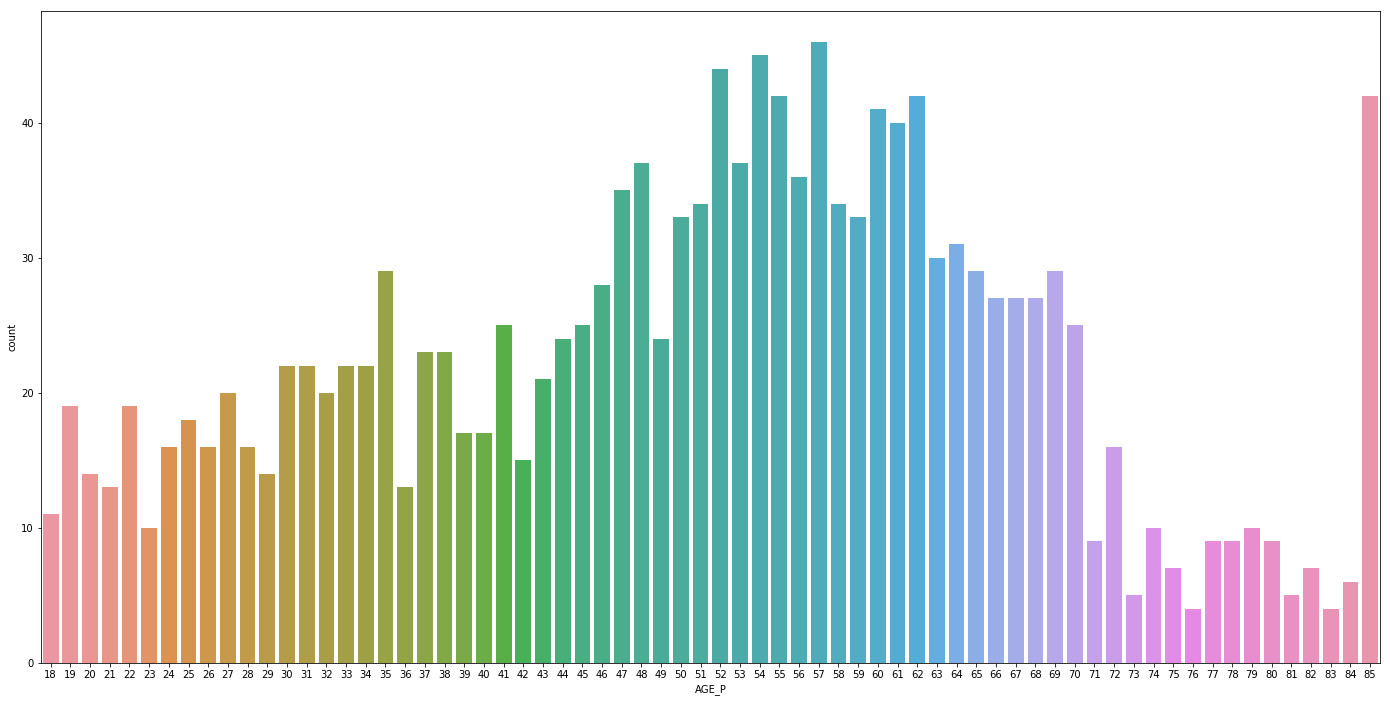

In [228]:
plt.figure(figsize = (24, 12))
sns.countplot(df_age['AGE_P'])

In [ ]:
age_dict = {'18-24': [18:24]}

## Plot of Depression X Age

In [230]:
def group_age(age):
    if age < 18:
        return ' < 18'
    if age < 24 and age > 18:
        return '18 - 24'
    elif age < 32:
        return '25 - 32'
    elif age < 42:
        return '33 - 42'
    elif age < 55:
        return '43 - 55'
    elif age < 65:
        return '56 - 65'
    elif age < 85:
        return '66 - 84'
    else:
        return '85+'
    
df_age['AGE_P'] = [group_age(i) for i in df_age['AGE_P']]

/Users/Andy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [231]:
df_age['AGE_P'].value_counts()

43 - 55    402
56 - 65    375
66 - 84    274
33 - 42    211
25 - 32    155
18 - 24     75
85+         42
Name: AGE_P, dtype: int64

In [234]:
age_traces = [ make_trace(
    make_df_for_counts(df_age, 'LADURB17', 'AGE_P', a, 'Depression Length', 'Age'),
    'Age', a) for a in depression_levels]

layout = go.Layout(
    barmode = 'stack',
    showlegend = True,
    title = 'Depression Length X Age', 
    
    xaxis=dict(
        title= 'Age (Years)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        )
    ),
    
    yaxis = dict(
        title = 'Count',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        
        showticklabels=True,
    )
)

fig = go.Figure(data= age_traces, layout=layout)
plotly.offline.plot(fig, filename='depressionXage.html')
py.iplot(fig, filename= 'depression X age')

/Users/Andy/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Plot of Depression and Age for Income < 5000


In [251]:
df_age['ERNYR_P'] = df_age['ERNYR_P'].apply(lambda x: str(ernyr_p_key[x]))
df_age['ERNYR_P'].value_counts()                                            

/Users/Andy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Unknown            1159
01-4,999             78
Don't know           47
05,000-9,999         44
25,000-34,999        34
10,000-14,999        31
35,000-44,999        25
15,000-19,999        23
75,000 and over      21
20,000-24,999        21
45,000-54,999        16
55,000-64,999        16
Refused              13
65,000-74,999         6
Name: ERNYR_P, dtype: int64

In [253]:
age_traces = [ make_trace(
    make_df_for_counts(df_age[df_age['ERNYR_P'] == '01-4,999'], 'LADURB17', 'AGE_P', a, 'Depression Length', 'Age'),'Age', a) for a in depression_levels]

layout = go.Layout(
    barmode = 'stack',
    showlegend = True,
    title = 'Depression Length X Age (Income < 5000)', 
    
    xaxis=dict(
        title= 'Age (Years)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        )
    ),
    
    yaxis = dict(
        title = 'Count',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        
        showticklabels=True,
    )
)

fig = go.Figure(data= age_traces, layout=layout)
plotly.offline.plot(fig, filename='depressionXageXincome<5k.html')
py.iplot(fig, filename= 'depression X age X income < 5k')




/Users/Andy/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Webscraping Reddit

In [2]:
import requests
import requests_cache 
import lxml.html as lx
import re
from datetime import datetime

requests_cache.install_cache("reddit_cache")

In [4]:
response = requests.get("https://old.reddit.com/r/depression/comments/anh7tv/regular_checkin_post/")
response.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [5]:
# https://www.reddit.com/r/redditdev/comments/3qbll8/429_too_many_requests/cwe2yay?utm_source=share&utm_medium=web2x
response = requests.get("https://old.reddit.com/r/depression/comments/anh7tv/regular_checkin_post/?limit=500",
                        headers = {'User-agent': 'your bot 0.1'})
response.raise_for_status



<bound method Response.raise_for_status of <Response [200]>>

In [10]:
html = lx.fromstring(response.text)

comment_block = html.xpath("//div[@class = 'sitetable nestedlisting']")[0]
len(comment_block) # gets all the comment blocks

comment_block[0][3] # goes into the [/div[@class = 'entry unvoted']]

<Element div at 0x1c22bb6d18>

In [122]:
e = comment_block[0].find_class('entry unvoted')[0]

e[0] # goes into p[@class = 'tagline']
print(e[0][1].get('href')) # userurl
print(e[0][3].get('title')) # dislikes
print(e[0][5].get('title')) # likes
print(e[0][6].get('datetime')) # dislikes

print(e[1]) # goes into comment
print(e[1][1][0]) # goes into //div[@class = 'usertext-body may-blank-within md-container ']/div
print(e[1][1][0][0].text) # gets the time

https://old.reddit.com/user/overwhelmed13
0
2
2019-05-05T21:25:03+00:00


In [114]:
def get_comment(e):
    try:
        comment =  ''.join([i.text + '\n' for i in e])
    except:
        comment = ''
    
    return comment

def get_comment_info(element):
    try:
        e = element.find_class('entry unvoted')[0]
        user_url = e[0][1].get('href')
        user_name = re.sub('https://old.reddit.com/user/', '', user_url)
        comment_dislikes = e[0][3].get('title')
        comment_likes = e[0][5].get('title')
        comment_time = e[0][6].get('datetime')
        comment = get_comment(e[1][1][0])

        return {"user_name": user_name, "user_url": user_url, "comment": comment, "time": comment_time,
                "likes": comment_likes, "dislikes": comment_dislikes}
    except:
        return {"user_name": user_name,"user_url": None, "comment": None, "time": None,
                "likes": None, "dislikes": None}
    

In [118]:
# since every even entry is meaningless
odd_comment_block = [comment_block[i] for i in np.arange(0,len(comment_block)) if i % 2 == 0]
odd_comment_block = odd_comment_block[:len(odd_comment_block) - 1]

df = pd.DataFrame([get_comment_info(x) for x in odd_comment_block])
df.head(5)

,comment,dislikes,likes,time,user_name,user_url
0,I have no one to talk to. I’m so fucking alone...,0,2,2019-05-05T21:25:03+00:00,overwhelmed13,https://old.reddit.com/user/overwhelmed13
1,I just feel kind of low today. I have been do...,0,2,2019-05-05T21:02:08+00:00,OutsideCreativ,https://old.reddit.com/user/OutsideCreativ
2,How can everyone from my family be so superfic...,0,2,2019-05-05T21:00:11+00:00,K4yr0,https://old.reddit.com/user/K4yr0
3,"I just want to be gone, but I keep waking up i...",0,2,2019-05-05T20:26:48+00:00,cantseeinrealtime,https://old.reddit.com/user/cantseeinrealtime
4,It's amazing how much people can create when t...,0,2,2019-05-05T20:10:12+00:00,K4yr0,https://old.reddit.com/user/K4yr0


In [152]:
def df_from_url(url):
    response = requests.get(url, headers = {'User-agent': 'your bot 0.1'})
    response.raise_for_status
    html = lx.fromstring(response.text)
    comment_block = html.xpath("//div[@class = 'sitetable nestedlisting']")[0]
    odd_comment_block = [comment_block[i] for i in np.arange(0,len(comment_block)) if i % 2 == 0]
    odd_comment_block = odd_comment_block[:len(odd_comment_block) - 1]
    df = pd.DataFrame([get_comment_info(x) for x in odd_comment_block])
    
    return df


In [177]:
urls = [
    'https://old.reddit.com/r/depression/comments/anh7tv/regular_checkin_post/',
    'https://old.reddit.com/r/depression/comments/95ezhs/regular_checkin_post/',
    'https://old.reddit.com/r/depression/comments/6swsuk/regular_checkin_and_some_info_about_highrisk_posts/',
    'https://old.reddit.com/r/depression/comments/6lfjbt/regular_checkin_plus_fyi_about_why_we_dont_allow/',
    'https://old.reddit.com/r/depression/comments/6a7gb9/rdepression_lets_check_in/',
    'https://old.reddit.com/r/depression/comments/6fx6lt/hi_rdepression_lets_check_in/',
    'https://old.reddit.com/r/depression/comments/6ju4xs/lets_check_in_tell_us_how_youre_doing_share_an/'
]

urls_new = [url + '?limit=500' for url in urls]
urls_top =  [url + '?sort=top&limit=500' for url in urls]

Ok so I was able to make a df from the most recent r/depression check in posts. It'll be easy to concat multiple into one. One problem is that this only gets the most recent 200 comments, and does not scrape the replies to these comments. There might be a way to be able to scrape all 4000+ comments in a r/depression check in post but I haven't been able to figure out yet.

In [178]:
urls_new

['https://old.reddit.com/r/depression/comments/anh7tv/regular_checkin_post/?limit=500',
 'https://old.reddit.com/r/depression/comments/95ezhs/regular_checkin_post/?limit=500',
 'https://old.reddit.com/r/depression/comments/6swsuk/regular_checkin_and_some_info_about_highrisk_posts/?limit=500',
 'https://old.reddit.com/r/depression/comments/6lfjbt/regular_checkin_plus_fyi_about_why_we_dont_allow/?limit=500',
 'https://old.reddit.com/r/depression/comments/6a7gb9/rdepression_lets_check_in/?limit=500',
 'https://old.reddit.com/r/depression/comments/6fx6lt/hi_rdepression_lets_check_in/?limit=500',
 'https://old.reddit.com/r/depression/comments/6ju4xs/lets_check_in_tell_us_how_youre_doing_share_an/?limit=500']

In [167]:
urls_top

['https://old.reddit.com/r/depression/comments/anh7tv/regular_checkin_post/?sort=top&limit=500',
 'https://old.reddit.com/r/depression/comments/95ezhs/regular_checkin_post/?sort=top&limit=500',
 'https://old.reddit.com/r/depression/comments/6swsuk/regular_checkin_and_some_info_about_highrisk_posts/?sort=top&limit=500',
 'https://old.reddit.com/r/depression/comments/6lfjbt/regular_checkin_plus_fyi_about_why_we_dont_allow/?sort=top&limit=500',
 'https://old.reddit.com/r/depression/comments/6a7gb9/rdepression_lets_check_in/?sort=top&limit=500',
 'https://old.reddit.com/r/depression/comments/6fx6lt/hi_rdepression_lets_check_in/?sort=top&limit=500',
 'https://old.reddit.com/r/depression/comments/6ju4xs/lets_check_in_tell_us_how_youre_doing_share_an/?sort=top&limit=500']

In [179]:
df_new = df_from_url(urls_new[0])
for url in urls_new[1:]:
    temp = df_from_url(url)
    df_new = pd.concat([df_new, temp])
    
df_top = df_from_url(urls_top[0])
for url in urls_top[1:]:
    temp = df_from_url(url)
    df_top = pd.concat([df_top, temp])

In [184]:
df_new

,comment,dislikes,likes,time,user_name,user_url
0,I’m really struggling. I’m pretty convinced no...,0,2,2019-05-09T00:03:14+00:00,KMoneySupreme,https://old.reddit.com/user/KMoneySupreme
1,I lashed out at a micro-managing coworker on M...,0,2,2019-05-08T23:49:18+00:00,avian_corvo,https://old.reddit.com/user/avian_corvo
2,It’s been so long since I’ve felt truly down. ...,0,2,2019-05-08T23:43:06+00:00,kkohler2,https://old.reddit.com/user/kkohler2
3,"""Eventually I'll grow out of being a piece of ...",0,2,2019-05-08T23:16:08+00:00,K4yr0,https://old.reddit.com/user/K4yr0
4,I feel like no matter what i do im the toxic p...,1,3,2019-05-08T20:59:10+00:00,thatevianthattedtalk,https://old.reddit.com/user/thatevianthattedtalk
5,I think I've just destroyed my connection to t...,1,3,2019-05-08T20:32:56+00:00,MuddlinThrough,https://old.reddit.com/user/MuddlinThrough
6,I just got an internship in my dream field of ...,3,5,2019-05-08T19:25:28+00:00,1acedude,https://old.reddit.com/user/1acedude
7,After writing and erasing this comment like 3 ...,2,4,2019-05-08T19:01:16+00:00,FedeWar,https://old.reddit.com/user/FedeWar
8,I am actually unwanted in every part of my lif...,4,6,2019-05-08T18:10:02+00:00,YpsitheFlintsider,https://old.reddit.com/user/YpsitheFlintsider
9,Saw the girl I love kissing another guy today\...,2,4,2019-05-08T17:05:45+00:00,Phenrique25,https://old.reddit.com/user/Phenrique25


In [185]:
df_top

,comment,dislikes,likes,time,user_name,user_url
0,"No offense, but really does anyone care?\nI fe...",95,97,2019-02-05T19:27:43+00:00,Talkryn,https://old.reddit.com/user/Talkryn
1,I don't enjoy anything anymore. Surviving eac...,62,64,2019-02-06T15:02:06+00:00,jwood0087,https://old.reddit.com/user/jwood0087
2,Nobody really gives a fuck tbh. They say they ...,39,41,2019-02-07T07:32:14+00:00,Foxtreal,https://old.reddit.com/user/Foxtreal
3,still feel like shit\n,31,33,2019-02-05T18:54:11+00:00,ProposterousLobster,https://old.reddit.com/user/ProposterousLobster
4,"I’m so tired. God, I’m just so tired. \n",29,31,2019-02-15T18:00:31+00:00,eunwolll,https://old.reddit.com/user/eunwolll
5,"I tried opening up to my mom, and she then tol...",26,28,2019-02-07T22:32:20+00:00,andnowiamnothing,https://old.reddit.com/user/andnowiamnothing
6,I can't help myself anymore. I'm just throwing...,27,29,2019-02-17T07:04:20+00:00,OneMoreaccountt,https://old.reddit.com/user/OneMoreaccountt
7,I have been dealing with depression for awhile...,19,21,2019-02-06T23:17:02+00:00,Norme-98,https://old.reddit.com/user/Norme-98
8,I just want to die in my sleep\n,19,21,2019-03-02T08:34:25+00:00,PuffaloBuffalo,https://old.reddit.com/user/PuffaloBuffalo
9,"Depression is laying in your own bed, wishing ...",18,20,2019-03-12T14:15:04+00:00,insanecrazy4,https://old.reddit.com/user/insanecrazy4


In [186]:
df_new[df_new['user_name'] == 'K4yr0']

,comment,dislikes,likes,time,user_name,user_url
3,"""Eventually I'll grow out of being a piece of ...",0,2,2019-05-08T23:16:08+00:00,K4yr0,https://old.reddit.com/user/K4yr0
39,Back from a big city to the countryside where ...,2,4,2019-05-07T16:56:27+00:00,K4yr0,https://old.reddit.com/user/K4yr0
74,Staying at my brothers place in the city (he i...,0,2,2019-05-06T12:22:27+00:00,K4yr0,https://old.reddit.com/user/K4yr0
77,How is it having a happy \n,2,4,2019-05-06T03:56:22+00:00,K4yr0,https://old.reddit.com/user/K4yr0
87,How can everyone from my family be so superfic...,2,4,2019-05-05T21:00:11+00:00,K4yr0,https://old.reddit.com/user/K4yr0
89,It's amazing how much people can create when t...,3,5,2019-05-05T20:10:12+00:00,K4yr0,https://old.reddit.com/user/K4yr0
98,A few days ago someone I know who's my age and...,1,3,2019-05-05T09:59:44+00:00,K4yr0,https://old.reddit.com/user/K4yr0
101,"Waking up in the morning thinking ""who am I ag...",2,4,2019-05-05T07:06:57+00:00,K4yr0,https://old.reddit.com/user/K4yr0
110,With social anxiety it's like you are starving...,4,6,2019-05-04T18:55:51+00:00,K4yr0,https://old.reddit.com/user/K4yr0
126,Parents dragging me to stuff and expecting me ...,1,3,2019-05-03T22:59:49+00:00,K4yr0,https://old.reddit.com/user/K4yr0
